In [1]:
import pandas as pd 
import numpy as np
import re 
import sklearn
import scipy as sp
import string
import matplotlib.pyplot as plt
import nltk 
import emoji
import emojis
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
import os 
os.chdir('D:\\dataset\\new_data\\sentiment_1856')
os.getcwd()

'D:\\dataset\\new_data\\sentiment_1856'

In [4]:
usecolemns = ['spell_correct_without_emo','emoji_number','Bsentiment']
corpus = pd.read_csv("sentiment_1856.csv", usecols = usecolemns)

#corpus = pd.read_csv("final_dataset_2023 - Copy (4).csv", usecols = usecolemns)

corpus['spell_correct_without_emo']=corpus['spell_correct_without_emo'].astype(str)

In [5]:
corpus['Bsentiment'].value_counts()

aggressive             353
sexually_abusive       318
supportive             309
normal_comment         279
sad                    245
religiously_abusive    148
happy                  112
meaningless             92
Name: Bsentiment, dtype: int64

In [6]:
#tf_idf on dataset 
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3)), 'spell_correct_without_emo')
], remainder='passthrough')

In [7]:
x=corpus[['spell_correct_without_emo','emoji_number']]
y=corpus.Bsentiment
xtrain, xtest, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=3)

In [8]:
x_train_tf = transformer.fit_transform(xtrain)
x_test_tf=  transformer.transform(xtest)

In [9]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y)


array(['aggressive', 'happy', 'meaningless', 'normal_comment',
       'religiously_abusive', 'sad', 'sexually_abusive', 'supportive'],
      dtype='<U19')

In [10]:
#confusion matrics
import seaborn as sns
def plot (y_test, y_predict,model_name):
    
    plt.figure(figsize=(3,3))
    labels=unique_labels(y_test)
    colum=[f'{ label}' for label in labels]
    indc=[f' { label}' for label in labels]
    table=pd.DataFrame(metrics.confusion_matrix(y_test, y_predict),
                       columns= colum, index=indc)
    sns.heatmap(table, annot=True, fmt='d', cbar=False, cmap=plt.cm.GnBu, linewidths=0.2,linecolor='c')
    
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix of {}'.format(model_name))
    plt.show()
    
    #return table

In [11]:
def accuracy_class_report(y_test, y_predict, file_name,model_name ):
    accuracynb = (metrics.accuracy_score(y_test, y_predict))*100
    print("accuracy:   %0.3f%%" % accuracynb)

    report_dict = metrics.classification_report(y_test, y_predict, output_dict=True,zero_division=0)
    classification_report_naive=pd.DataFrame(report_dict)
    classification_report_naive.to_csv(file_name)
    print(metrics.classification_report(y_test, y_predict,zero_division=0))
    plot(y_test, y_predict, model_name)

In [12]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train_tf, y_train)
predictknn=knn1.predict(x_test_tf)
accuracyknn = (metrics.accuracy_score(y_test, predictknn))*100
print("accuracy for knn 1:   %0.3f%%" % accuracyknn)

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(x_train_tf, y_train)
predictknn=knn2.predict(x_test_tf)
accuracyknn = (metrics.accuracy_score(y_test, predictknn))*100
print("accuracy for knn 2:   %0.3f%%" % accuracyknn)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train_tf, y_train)
predictknn=knn3.predict(x_test_tf)
accuracyknn = (metrics.accuracy_score(y_test, predictknn))*100
print("accuracy for knn 3:   %0.3f%%" % accuracyknn)


knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(x_train_tf, y_train)
predictknn=knn4.predict(x_test_tf)
accuracyknn = (metrics.accuracy_score(y_test, predictknn))*100
print("accuracy for knn 4:   %0.3f%%" % accuracyknn)
                      

knn5= KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train_tf, y_train)
predictknn=knn5.predict(x_test_tf)
accuracyknn = (metrics.accuracy_score(y_test, predictknn))*100
print("accuracy for knn 5:   %0.3f%%" % accuracyknn)
                      

knn6 = KNeighborsClassifier(n_neighbors=3)
knn6.fit(x_train_tf, y_train)
predictknn=knn6.predict(x_test_tf)
accuracyknn = (metrics.accuracy_score(y_test, predictknn))*100
print("accuracy for knn 6:   %0.3f%%" % accuracyknn)

accuracy for knn 1:   49.138%
accuracy for knn 2:   39.224%
accuracy for knn 3:   32.759%
accuracy for knn 4:   37.069%
accuracy for knn 5:   35.560%
accuracy for knn 6:   32.759%


accuracy:   49.138%
                     precision    recall  f1-score   support

         aggressive       0.38      0.28      0.32        80
              happy       0.80      0.43      0.56        28
        meaningless       0.50      0.04      0.08        23
     normal_comment       0.55      0.09      0.16        65
religiously_abusive       0.33      0.02      0.04        42
                sad       0.97      0.64      0.78        59
   sexually_abusive       0.27      0.89      0.41        75
         supportive       0.95      0.88      0.92        92

           accuracy                           0.49       464
          macro avg       0.59      0.41      0.41       464
       weighted avg       0.60      0.49      0.47       464



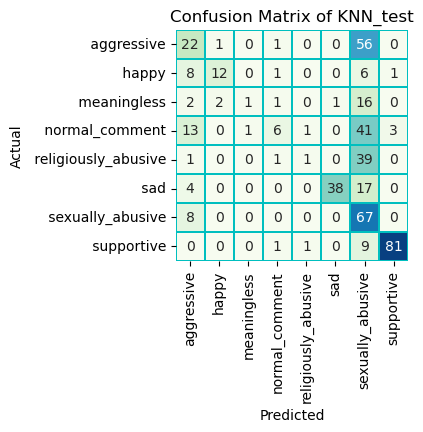

accuracy:   97.989%
                     precision    recall  f1-score   support

         aggressive       0.97      0.97      0.97       273
              happy       1.00      0.95      0.98        84
        meaningless       1.00      0.99      0.99        69
     normal_comment       1.00      0.97      0.98       214
religiously_abusive       0.99      1.00      1.00       106
                sad       1.00      0.99      0.99       186
   sexually_abusive       0.94      0.98      0.96       243
         supportive       0.99      1.00      0.99       217

           accuracy                           0.98      1392
          macro avg       0.99      0.98      0.98      1392
       weighted avg       0.98      0.98      0.98      1392



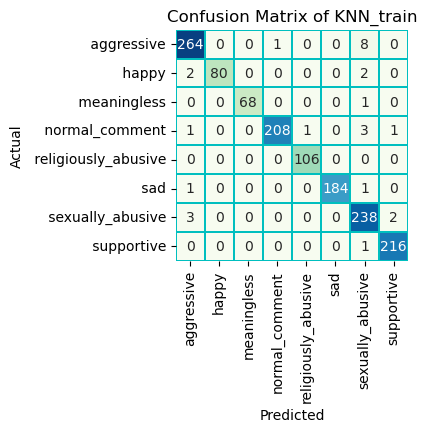

In [13]:

predictknn1_test=knn1.predict(x_test_tf)
accuracy_class_report(y_test, predictknn1_test, '1knn_report_1_test.xlsx', "KNN_test")

predictknn1_train=knn1.predict(x_train_tf)
accuracy_class_report(y_train, predictknn1_train, '1knn_report_1_train.xlsx', "KNN_train")

accuracy:   53.879%
                     precision    recall  f1-score   support

         aggressive       0.32      0.51      0.39        80
              happy       0.34      0.89      0.50        28
        meaningless       0.00      0.00      0.00        23
     normal_comment       0.68      0.26      0.38        65
religiously_abusive       1.00      0.02      0.05        42
                sad       0.88      0.63      0.73        59
   sexually_abusive       0.54      0.76      0.63        75
         supportive       0.83      0.78      0.80        92

           accuracy                           0.54       464
          macro avg       0.57      0.48      0.43       464
       weighted avg       0.62      0.54      0.51       464



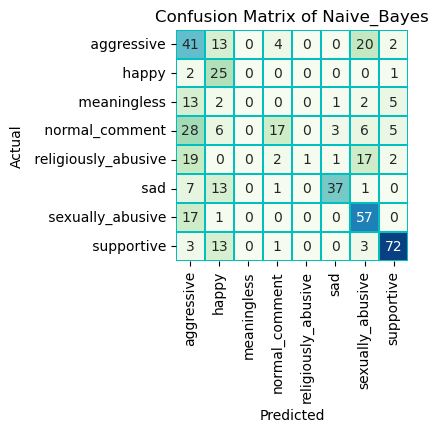

accuracy:   80.316%
                     precision    recall  f1-score   support

         aggressive       0.67      0.88      0.76       273
              happy       0.38      0.77      0.51        84
        meaningless       1.00      0.03      0.06        69
     normal_comment       0.99      0.81      0.89       214
religiously_abusive       1.00      0.58      0.74       106
                sad       0.96      0.91      0.93       186
   sexually_abusive       0.86      0.89      0.88       243
         supportive       0.97      0.87      0.92       217

           accuracy                           0.80      1392
          macro avg       0.85      0.72      0.71      1392
       weighted avg       0.86      0.80      0.80      1392



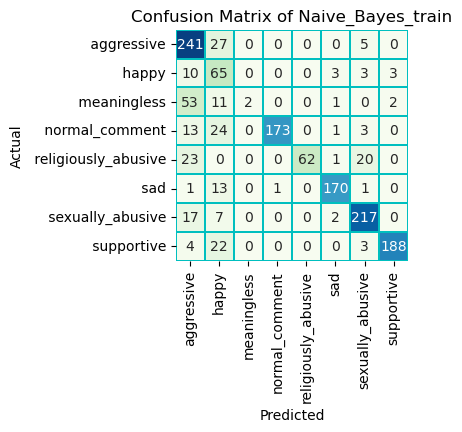

In [14]:
#applying classificatin algorithm naive bayes
 
from sklearn.naive_bayes import MultinomialNB
naive=MultinomialNB().fit(x_train_tf, y_train) 
predicnaive= naive.predict(x_test_tf)

accuracynb = (metrics.accuracy_score(y_test, predicnaive))*100
accuracy_class_report(y_test,predicnaive, 'naive report.xlsx', "Naive_Bayes")

predicnaive_train= naive.predict(x_train_tf)
accuracy_class_report(y_train,predicnaive_train, 'naive report_train.xlsx', "Naive_Bayes_train")

accuracy:   64.224%
                     precision    recall  f1-score   support

         aggressive       0.37      0.60      0.46        80
              happy       0.89      0.57      0.70        28
        meaningless       1.00      0.13      0.23        23
     normal_comment       0.54      0.45      0.49        65
religiously_abusive       0.87      0.31      0.46        42
                sad       0.91      0.85      0.88        59
   sexually_abusive       0.58      0.76      0.66        75
         supportive       0.90      0.89      0.90        92

           accuracy                           0.64       464
          macro avg       0.76      0.57      0.59       464
       weighted avg       0.71      0.64      0.64       464



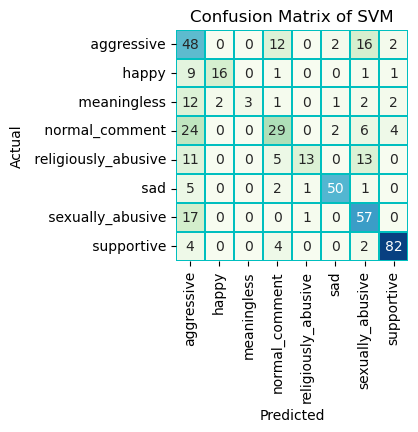

In [15]:
#Apply liner SVM
svmmodel_linear = SVC(kernel='linear', C=5) # for c=1,2,3,4 accuracy 1=63.362, 2=64.655, 3=64.440, 4=64.224%, 5=64.224%
svmmodel_linear.fit(x_train_tf, y_train)
predictsvmlinear= svmmodel_linear .predict(x_test_tf)
scoresvm = (metrics.accuracy_score(y_test, predictsvmlinear))*100
accuracy_class_report(y_test, predictsvmlinear, 'class svm linear.xlsx', "SVM")

accuracy:   25.216%
                     precision    recall  f1-score   support

         aggressive       0.19      1.00      0.32        80
              happy       1.00      0.43      0.60        28
        meaningless       0.00      0.00      0.00        23
     normal_comment       1.00      0.02      0.03        65
religiously_abusive       0.00      0.00      0.00        42
                sad       1.00      0.20      0.34        59
   sexually_abusive       0.00      0.00      0.00        75
         supportive       0.92      0.13      0.23        92

           accuracy                           0.25       464
          macro avg       0.51      0.22      0.19       464
       weighted avg       0.54      0.25      0.18       464



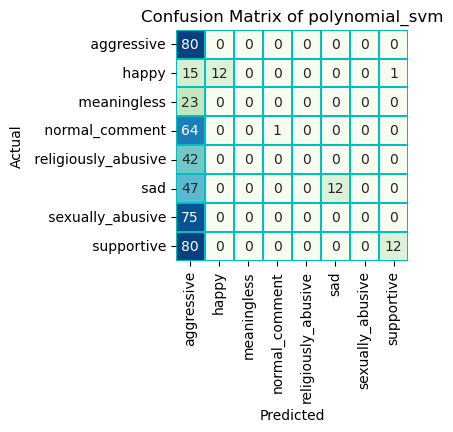

In [16]:
#Apply polynomial SVM
svmmodel_poly = SVC(kernel='poly', degree=3, C=5) #degree 3= 25.216% , 4=23.70% 5= 24.784%, c=1=24.569%,
svmmodel_poly.fit(x_train_tf, y_train)
predictsvmpoly = svmmodel_poly .predict(x_test_tf)
scoresvm = (metrics.accuracy_score(y_test, predictsvmpoly))*100
accuracy_class_report(y_test, predictsvmpoly, 'class svm poly.xlsx', "polynomial_svm")


accuracy:   50.216%
                     precision    recall  f1-score   support

         aggressive       0.27      0.64      0.38        80
              happy       0.23      0.39      0.29        28
        meaningless       0.00      0.00      0.00        23
     normal_comment       0.59      0.29      0.39        65
religiously_abusive       1.00      0.10      0.17        42
                sad       0.80      0.59      0.68        59
   sexually_abusive       0.64      0.72      0.68        75
         supportive       0.92      0.64      0.76        92

           accuracy                           0.50       464
          macro avg       0.56      0.42      0.42       464
       weighted avg       0.62      0.50      0.50       464



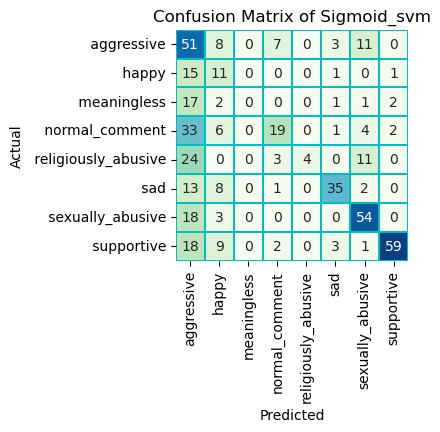

In [17]:
#Apply sigmoid SVM
svmmodel_sigmoid = SVC(kernel='sigmoid', C=5) #degree 1=32.3283, 2= 53.664%, 3=59.052% , 4=63.147%, c=5= 50.216%
svmmodel_sigmoid.fit(x_train_tf, y_train)
predictsvmsigmoid = svmmodel_sigmoid .predict(x_test_tf)
scoresvm = (metrics.accuracy_score(y_test, predictsvmsigmoid))*100
accuracy_class_report(y_test, predictsvmsigmoid, 'class svm sigmoid.xlsx', "Sigmoid_svm")



accuracy:   64.655%
                     precision    recall  f1-score   support

         aggressive       0.42      0.54      0.47        80
              happy       0.90      0.64      0.75        28
        meaningless       1.00      0.09      0.16        23
     normal_comment       0.56      0.49      0.52        65
religiously_abusive       1.00      0.33      0.50        42
                sad       0.71      0.78      0.74        59
   sexually_abusive       0.55      0.81      0.66        75
         supportive       0.91      0.91      0.91        92

           accuracy                           0.65       464
          macro avg       0.76      0.57      0.59       464
       weighted avg       0.70      0.65      0.63       464



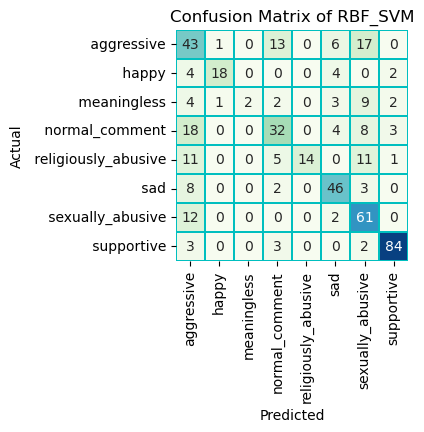

In [18]:
# Apply RBF SVM
svmmodel_rbf = SVC(kernel='rbf', C=5) #degree 1=32.3283, 2= 53.664%, 3=59.052% , 4=63.147%, c=5 64.224%
svmmodel_rbf.fit(x_train_tf, y_train)
predictsvmrbf = svmmodel_rbf .predict(x_test_tf)
scoresvm = (metrics.accuracy_score(y_test, predictsvmrbf))*100
accuracy_class_report(y_test, predictsvmrbf, 'class svm rbf.xlsx', "RBF_SVM")

accuracy:   97.557%
                     precision    recall  f1-score   support

         aggressive       0.96      0.96      0.96       273
              happy       1.00      0.95      0.98        84
        meaningless       1.00      0.99      0.99        69
     normal_comment       0.99      0.97      0.98       214
religiously_abusive       1.00      0.98      0.99       106
                sad       0.97      0.99      0.98       186
   sexually_abusive       0.93      0.98      0.96       243
         supportive       1.00      0.99      0.99       217

           accuracy                           0.98      1392
          macro avg       0.98      0.98      0.98      1392
       weighted avg       0.98      0.98      0.98      1392



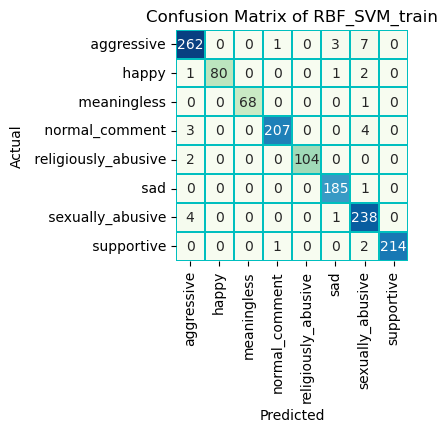

accuracy:   97.486%
                     precision    recall  f1-score   support

         aggressive       0.91      0.99      0.95       273
              happy       1.00      0.94      0.97        84
        meaningless       1.00      0.99      0.99        69
     normal_comment       1.00      0.97      0.98       214
religiously_abusive       1.00      0.99      1.00       106
                sad       0.99      0.99      0.99       186
   sexually_abusive       0.98      0.93      0.96       243
         supportive       1.00      0.99      0.99       217

           accuracy                           0.97      1392
          macro avg       0.98      0.97      0.98      1392
       weighted avg       0.98      0.97      0.98      1392



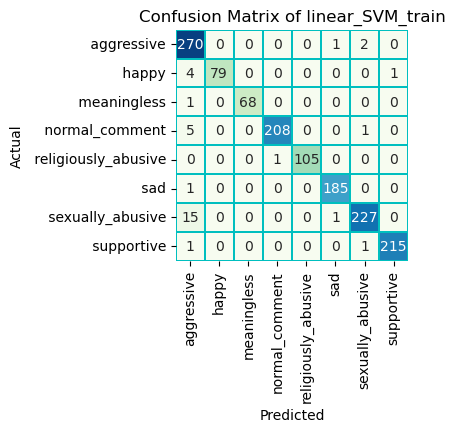

In [19]:
predictsvmrbf_train = svmmodel_rbf.predict(x_train_tf)
accuracy_class_report(y_train, predictsvmrbf_train, 'class svm rbf_train.xlsx', "RBF_SVM_train")

predictsvmlinear_train = svmmodel_linear.predict(x_train_tf)
accuracy_class_report(y_train, predictsvmlinear_train, 'class svm linear_train.xlsx', "linear_SVM_train")

In [20]:
rfclassifier100 = RandomForestClassifier(n_estimators = 100, random_state=20)
rfclassifier100.fit(x_train_tf, y_train)
predictrf100=rfclassifier100.predict(x_test_tf)
accuracyrf100 = (metrics.accuracy_score(y_test, predictrf100))*100
print("accuracy for rf 100:   %0.3f%%" % accuracyrf100)

rfclassifier150 = RandomForestClassifier(n_estimators = 150, random_state=20)
rfclassifier150.fit(x_train_tf, y_train)
predictrf150=rfclassifier150.predict(x_test_tf)
accuracyrf150 = (metrics.accuracy_score(y_test, predictrf150))*100
print("accuracy for rf 150:   %0.3f%%" % accuracyrf150)

rfclassifier170 = RandomForestClassifier(n_estimators = 170, random_state=20)
rfclassifier170.fit(x_train_tf, y_train)
predictrf170=rfclassifier170.predict(x_test_tf)
accuracyrf170 = (metrics.accuracy_score(y_test, predictrf170))*100
print("accuracy for rf 170:   %0.3f%%" % accuracyrf170)

rfclassifier200 = RandomForestClassifier(n_estimators = 200, random_state=20)
rfclassifier200.fit(x_train_tf, y_train)
predictrf200=rfclassifier200.predict(x_test_tf)
accuracyrf200 = (metrics.accuracy_score(y_test, predictrf200))*100
print("accuracy for rf 200:   %0.3f%%" % accuracyrf200)

rfclassifier270 = RandomForestClassifier(n_estimators = 270, random_state=20)
rfclassifier270.fit(x_train_tf, y_train)
predictrf270=rfclassifier270.predict(x_test_tf)
accuracyrf270 = (metrics.accuracy_score(y_test, predictrf270))*100
print("accuracy for rf 270:   %0.3f%%" % accuracyrf270)

rfclassifier300 = RandomForestClassifier(n_estimators = 300, random_state=20)
rfclassifier300.fit(x_train_tf, y_train)
predictrf300=rfclassifier300.predict(x_test_tf)
accuracyrf300 = (metrics.accuracy_score(y_test, predictrf300))*100
print("accuracy for rf 300:   %0.3f%%" % accuracyrf300)

rfclassifier400 = RandomForestClassifier(n_estimators = 400, random_state=20)
rfclassifier400.fit(x_train_tf, y_train)
predictrf400=rfclassifier400.predict(x_test_tf)
accuracyrf400 = (metrics.accuracy_score(y_test, predictrf400))*100
print("accuracy for rf 400:   %0.3f%%" % accuracyrf400)

rfclassifier500 = RandomForestClassifier(n_estimators = 500, random_state=20)
rfclassifier500.fit(x_train_tf, y_train)
predictrf500=rfclassifier500.predict(x_test_tf)
accuracyrf500 = (metrics.accuracy_score(y_test, predictrf500))*100
print("accuracy for rf 500:   %0.3f%%" % accuracyrf500)

accuracy for rf 100:   58.621%
accuracy for rf 150:   58.621%
accuracy for rf 170:   58.621%
accuracy for rf 200:   58.190%
accuracy for rf 270:   59.698%
accuracy for rf 300:   59.698%
accuracy for rf 400:   59.698%
accuracy for rf 500:   59.483%


accuracy:   59.698%
                     precision    recall  f1-score   support

         aggressive       0.37      0.49      0.42        80
              happy       0.76      0.46      0.58        28
        meaningless       1.00      0.04      0.08        23
     normal_comment       0.62      0.37      0.46        65
religiously_abusive       0.86      0.29      0.43        42
                sad       0.98      0.76      0.86        59
   sexually_abusive       0.41      0.81      0.55        75
         supportive       0.88      0.89      0.89        92

           accuracy                           0.60       464
          macro avg       0.73      0.51      0.53       464
       weighted avg       0.69      0.60      0.59       464



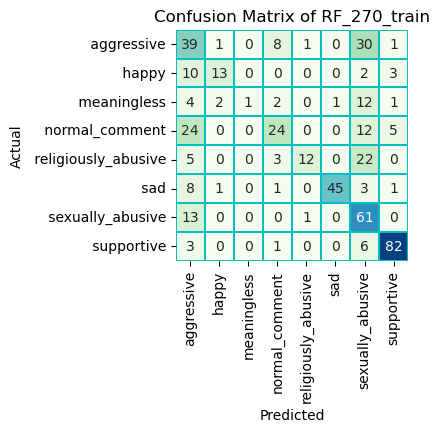

accuracy:   98.060%
                     precision    recall  f1-score   support

         aggressive       0.97      0.97      0.97       273
              happy       1.00      0.95      0.98        84
        meaningless       1.00      0.99      0.99        69
     normal_comment       1.00      0.97      0.98       214
religiously_abusive       1.00      0.99      1.00       106
                sad       1.00      0.99      0.99       186
   sexually_abusive       0.93      0.98      0.96       243
         supportive       1.00      0.99      1.00       217

           accuracy                           0.98      1392
          macro avg       0.99      0.98      0.98      1392
       weighted avg       0.98      0.98      0.98      1392



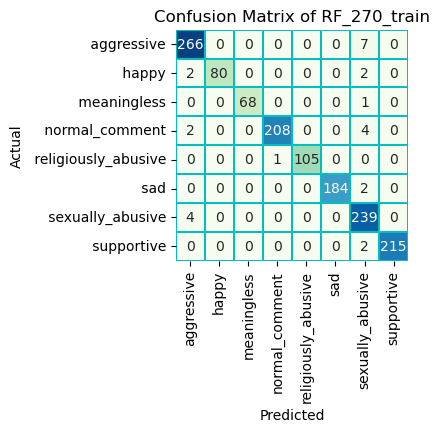

In [21]:
predictrf270_test=rfclassifier270.predict(x_test_tf)
accuracy_class_report(y_test,predictrf270_test,'rf_report_270_test.xlsx', "RF_270_train")

predictrf270_train=rfclassifier270.predict(x_train_tf)
accuracy_class_report(y_train,predictrf270_train,'rf_report_270_train.xlsx', "RF_270_train")


accuracy:   59.914%
                     precision    recall  f1-score   support

         aggressive       0.34      0.61      0.44        80
              happy       0.89      0.61      0.72        28
        meaningless       0.00      0.00      0.00        23
     normal_comment       0.56      0.37      0.44        65
religiously_abusive       1.00      0.07      0.13        42
                sad       0.96      0.76      0.85        59
   sexually_abusive       0.53      0.77      0.63        75
         supportive       0.83      0.89      0.86        92

           accuracy                           0.60       464
          macro avg       0.64      0.51      0.51       464
       weighted avg       0.65      0.60      0.57       464



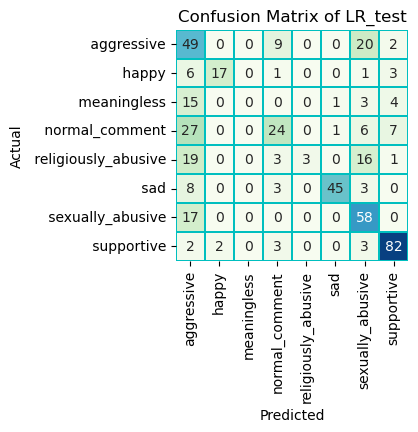

accuracy:   88.147%
                     precision    recall  f1-score   support

         aggressive       0.70      0.96      0.81       273
              happy       0.87      0.65      0.75        84
        meaningless       1.00      0.07      0.14        69
     normal_comment       0.98      0.93      0.95       214
religiously_abusive       1.00      0.87      0.93       106
                sad       0.98      0.97      0.98       186
   sexually_abusive       0.90      0.91      0.90       243
         supportive       0.96      0.97      0.97       217

           accuracy                           0.88      1392
          macro avg       0.92      0.79      0.80      1392
       weighted avg       0.90      0.88      0.87      1392



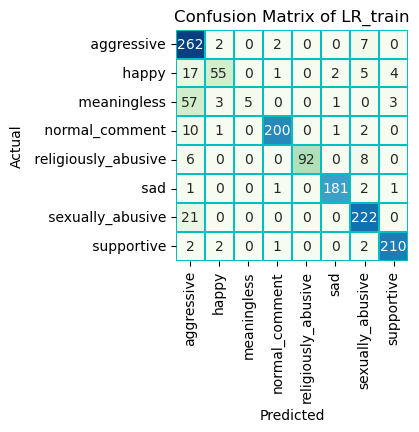

In [27]:
#Apply LR classifier
logicregression= LogisticRegression(multi_class='multinomial',solver='lbfgs',C=1.0, max_iter=400) #Make an instance of the Model
logicregression.fit(x_train_tf, y_train)
predictlr=logicregression.predict(x_test_tf)
accuracy_class_report(y_test, predictlr, 'lr report.xlsx', "LR_test")

predictlr_train=logicregression.predict(x_train_tf)
accuracy_class_report(y_train, predictlr_train, 'lr report_train.xlsx', "LR_train")

In [28]:
type(xtrain)

pandas.core.frame.DataFrame

In [29]:
dataset_store_sentiment_test = pd.DataFrame({'spell_correct_without_emo': xtest.spell_correct_without_emo,
                                             "emoji_number":xtest.emoji_number,
                                             "Acutal_Setniment": y_test,
                                             "KNN_1_predict": predictknn1_test,
                                             "Naive_Bayes": predicnaive,
                                             "SVM_linear_predict": predictsvmlinear,
                                             "SVM_Polynomial":predictsvmpoly,
                                             "SVM_sigmoid": predictsvmsigmoid,
                                             "SVM_RBF": predictsvmrbf,
                                             "RF-270":predictrf270_test,
                                             "Logistic_Regression":predictlr,
                                              
                                            })

dataset_store_sentiment_test.to_csv("Setniment_detect_1856_test.csv")

In [30]:
dataset_store_sentiment_train = pd.DataFrame({'spell_correct_without_emo': xtrain.spell_correct_without_emo,
                                             "emoji_number":xtrain.emoji_number,
                                             "Acutal_Setniment": y_train,
                                             "KNN_1_predict": predictknn1_train,
                                             "Naive_Bayes": predicnaive_train,
                                             "SVM_linear_predict": predictsvmlinear_train,
                                             "SVM_RBF": predictsvmrbf_train,
                                             "RF-270":predictrf270_train,
                                             "Logistic_Regression":predictlr_train,
                                              
                                            })

dataset_store_sentiment_train.to_csv("Setniment_detect_1856_train.csv")
dataset_store_sentiment_train.shape

(1392, 9)

In [31]:
cmap = [Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, 
BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, 
Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, 
PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, 
RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, 
Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, 
YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r,
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, 
gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, 
inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r,
ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, 
tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
viridis, viridis_r, vlag, vlag_r, winter, winter_r]

NameError: name 'Accent' is not defined